# Applying the perceptron theory
Although we're going to use the `tensorflow` library, we're going to mainly use the high level library [`keras`](https://keras.io/), that was previously standalone but got integrated into the newer version of tensorflow when it's author, [Francois Chollet](https://twitter.com/fchollet?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Eauthor), went to work for Google.

We'll be coding the same neural network as we did in for `pytorch`. Make sure to review it before diving into this chapter, as I will not re-explain everything.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
%matplotlib inline

Just like the previous chapter, load the same dataset using the same method. However, no need to convert them to tensors, as we are not using `pytorch` anymore.

In [2]:
# TO COMPLETE:  Load dataset
# Load dataset
filename = "./data/iris.csv"
df = pd.read_csv(filename)
df = df.sample(frac=1).reset_index(drop=True) # Shuffle dataframe
df.head()
print(df.shape)
print(df["species"].value_counts())

# Creating a test/train split
train_test_split_fraction = 0.80
split_index = int(df.shape[0] * train_test_split_fraction)
df_train = df[:split_index]
df_test = df[split_index:]
target = pd.get_dummies(df['species']).values # One hot encode

# Selecting the features and the target
X_train = df_train.drop('species', axis = 1).values
X_test = df_test.drop('species', axis = 1).values

y_train = target[:split_index]
y_test = target[split_index:]

print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

(150, 5)
Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: species, dtype: int64
(120, 4) (30, 4) (120, 3) (30, 3)


In [3]:
# Setting some constants
nb_hidden_neurons = 10
nb_classes = len(pd.unique(df['species']))
nb_features= X_train.shape[1]
batch_size = 1

In `keras`, there are [three ways](https://www.pyimagesearch.com/2019/10/28/3-ways-to-create-a-keras-model-with-tensorflow-2-0-sequential-functional-and-model-subclassing/) to build a neural network. We are going to focus on the `Sequential` mode, so that you can see different ways of building one. In `pytorch`, we mostly did something similar to the model subclassing and functional approach of keras.

Here below, we want you to construct the model architecture; the same one that was used in the previous chapter. You see a recap below.

*Hint: a linear layer in keras is `keras.layers.Dense`*

In [48]:
from keras.models import Sequential
from tensorflow.keras import layers

# Define Sequential model with 3 layers
model = Sequential()
model.add(layers.Dense(nb_hidden_neurons, activation="relu", input_shape=(nb_features,), name="layer1"))
model.add(layers.Dense(nb_hidden_neurons, activation="relu", name="layer2"))
model.add(layers.Dense(nb_classes, activation= "softmax", name="layer3"))

#TO COMPLETE: Build the model with `model.build()`. You might need to specify the `input_shape`.
model.layers

In [49]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 10)                50        
_________________________________________________________________
layer2 (Dense)               (None, 10)                110       
_________________________________________________________________
layer3 (Dense)               (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


`model.summary()` should return the following if you've done everything right

```
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
dense_6 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 33        
=================================================================
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
```

In [85]:
#Making sure the type is correct
X_train = X_train.astype("float32")
y_train = y_train.astype("float32")
X_test = X_test.astype("float32")
y_test = y_test.astype("float32")
print(X_train.shape)

(120, 4)


In [57]:
from keras.optimizers import SGD,Adam
from keras.losses import MSE

learning_rate = 0.04
optimizer = Adam(lr=learning_rate)
loss = MSE

In [58]:
# TO COMPLETE:
# - compile the model using `model.compile()` and the variables set before
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
# - create a variable `history`

# - fit the model and assign the result to `history`
history = model.fit(X_train, y_train, epochs=15)

Epoch 1/15
4/4 [==============================] - 1s 2ms/step - loss: 0.1804 - accuracy: 0.5796
Epoch 2/15
4/4 [==============================] - 0s 3ms/step - loss: 0.1376 - accuracy: 0.7069
Epoch 3/15
4/4 [==============================] - 0s 3ms/step - loss: 0.1657 - accuracy: 0.6569
Epoch 4/15
4/4 [==============================] - 0s 2ms/step - loss: 0.1139 - accuracy: 0.7146
Epoch 5/15
4/4 [==============================] - 0s 3ms/step - loss: 0.1027 - accuracy: 0.7490
Epoch 6/15
4/4 [==============================] - 0s 2ms/step - loss: 0.0946 - accuracy: 0.7006
Epoch 7/15
4/4 [==============================] - 0s 3ms/step - loss: 0.0916 - accuracy: 0.7992
Epoch 8/15
4/4 [==============================] - 0s 3ms/step - loss: 0.0863 - accuracy: 0.8812
Epoch 9/15
4/4 [==============================] - 0s 3ms/step - loss: 0.0844 - accuracy: 0.7929
Epoch 10/15
4/4 [==============================] - 0s 3ms/step - loss: 0.0692 - accuracy: 0.9362
Epoch 11/15
4/4 [======================

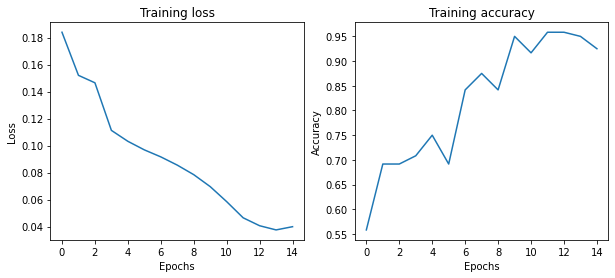

In [59]:
loss = history.history['loss']
accuracy = history.history['accuracy']

fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
axs[0].plot(range(len(loss)), loss)
axs[0].set(xlabel="Epochs", ylabel="Loss", title="Training loss")
axs[1].plot(range(len(accuracy)), accuracy)
axs[1].set(xlabel="Epochs", ylabel="Accuracy", title="Training accuracy")
plt.show()

The loss shall decrease and the accuracy shall increase. You should get something similar to this.
![Loss and accuracy ](./assets/tf_loss_and_accuracy.png)

Moreover, testing on the testing set shall result in a (near) perfect score.

In [62]:
# TO COMPLETE: Evaluate the model on the test set.
results = model.evaluate(X_test, y_test, verbose=0)
print(f"\nAccuracy on test set is {results[1]*100:.2f}%")


Accuracy on test set is 86.67%


*Voilà*, you've seen both approaches to create a neural network. Of course, there are still MANY things to learn about `pytorch` and `keras`, we've barely even scratched the surface. But now that you know the basics, you will be able to test them out on a new project!

In [83]:
y_pred = model.predict(X_test)
y_pred

array([[2.0742100e-03, 3.1812522e-01, 6.7980057e-01],
       [1.6567364e-03, 3.5059300e-01, 6.4775026e-01],
       [7.7485010e-06, 8.5273441e-03, 9.9146491e-01],
       [8.2969582e-06, 3.2427171e-03, 9.9674904e-01],
       [9.9992239e-01, 6.7657733e-05, 9.9428107e-06],
       [2.8335196e-05, 1.1964034e-02, 9.8800766e-01],
       [9.4221896e-06, 5.2380888e-03, 9.9475241e-01],
       [4.7885622e-03, 6.9415545e-01, 3.0105594e-01],
       [3.7585382e-05, 1.7960327e-02, 9.8200202e-01],
       [1.0574527e-05, 4.3807989e-03, 9.9560863e-01],
       [3.2706457e-04, 6.8675138e-02, 9.3099785e-01],
       [4.8243743e-03, 5.7944053e-01, 4.1573510e-01],
       [1.2791050e-02, 7.5293553e-01, 2.3427348e-01],
       [6.7020933e-06, 5.7406803e-03, 9.9425262e-01],
       [9.9930346e-01, 6.0488743e-04, 9.1567170e-05],
       [8.8819297e-04, 1.8408078e-01, 8.1503111e-01],
       [9.9982136e-01, 1.5536376e-04, 2.3182723e-05],
       [7.3929979e-03, 6.2435502e-01, 3.6825201e-01],
       [4.3527549e-03, 6.155

In [86]:
y_test

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [87]:
accuracy_score = tf.keras.metrics.Accuracy()

accuracy_score(y_pred,y_test)

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [88]:
tf.stack([y_test,y_pred],axis=1)

<tf.Tensor: shape=(30, 2, 3), dtype=float32, numpy=
array([[[0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
        [2.0742100e-03, 3.1812522e-01, 6.7980057e-01]],

       [[0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
        [1.6567364e-03, 3.5059300e-01, 6.4775026e-01]],

       [[0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
        [7.7485010e-06, 8.5273441e-03, 9.9146491e-01]],

       [[0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
        [8.2969582e-06, 3.2427171e-03, 9.9674904e-01]],

       [[1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [9.9992239e-01, 6.7657733e-05, 9.9428107e-06]],

       [[0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
        [2.8335196e-05, 1.1964034e-02, 9.8800766e-01]],

       [[0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
        [9.4221896e-06, 5.2380888e-03, 9.9475241e-01]],

       [[0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
        [4.7885622e-03, 6.9415545e-01, 3.0105594e-01]],

       [[0.0000000e+00, 0.0000000e+00, 1.0000000e+00